# Langgraph 1:Basics

In [7]:
#########  LangGraph  ##########################
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph.message import add_messages

import panel as pn
from typing import TypedDict, Annotated, List, Sequence
from IPython.display import display, Markdown,Latex,Image

This code creates a simple state graph with a single node and records the history:

1. **State Class (Briefcase to store and retrieve information)**: The `State` class contains the input (`input`) and a list of messages (`messages`).

2. **Node (Agent that receives, processes, and forwards information)**: `node1` sets the message to `"node1"` and outputs it.

3. **Graph Creation**:
   - A `StateGraph` builder adds `node1` as both the start and endpoint.

4. **Memory**: A `MemorySaver` stores the state’s sequence.

5. **Visualization**: The graph is displayed as a Mermaid diagram.

Result: A simple graph with a start and endpoint at the same node (`node1`), which saves the state.

In [8]:
class State(TypedDict):
    input: str
    messages: Annotated[list, add_messages]
    
    
state1=State()    
state1["input"]="hello"
state1["messages"]="Wassuup"
state1["messages"]+="HUHU"
state1["messages"]+=" hups"
state1["whatever"]="strange"

print("1",state1)
print("2",state1["messages"])
print("3",state1["messages"][0])



1 {'input': 'hello', 'messages': 'WassuupHUHU hups', 'whatever': 'strange'}
2 WassuupHUHU hups
3 W


In [9]:
for i in state1:
    print(i)
    
for i in state1["input"]:
    print(i)    

input
messages
whatever
h
e
l
l
o


In [10]:
state1=State()
print(state1)

{}


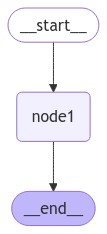

In [11]:
class State(TypedDict):
    input: str
    messages: Annotated[list, add_messages]
# Set up memory
memory = MemorySaver()

def node1(state:State):
    print("in node 1")
    state["messages"]=state["input"]
    return state 
builder = StateGraph(State)
builder.add_node("node1", node1)
builder.set_entry_point("node1") 
builder.set_finish_point("node1") 

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph().draw_mermaid_png()))

# To execute the graph, you can use either `graph.invoke` or `graph.stream`.
Explanation of the differences between `graph.stream` and `graph.invoke`:

---

The difference between `graph.stream` and `graph.invoke` often lies in how each method manages processing within the graph. Here’s a general explanation of both methods based on common use cases:

### 1. **`graph.invoke`**

- **Purpose**: `invoke` is typically a straightforward way to process the entire graph in a single call. It starts from the entry point, follows the defined edges, and executes each node sequentially until either an endpoint is reached or an interruption occurs.
- **Blocking Call**: Usually, `invoke` executes in a blocking manner, meaning it waits until the entire graph processing is completed before returning a result.
- **Usage**: Ideal for scenarios where a series of nodes should be processed without interruptions and the final result is needed in one step.

Example:
```python
state = State(input="an input value", messages=[])
final_state = graph.invoke(state)
print(final_state["messages"])  # Outputs the result after the entire graph has been processed.
```

### 2. **`graph.stream`**

- **Purpose**: In contrast, `stream` is designed for **step-by-step or real-time processing**. It allows each node to be processed individually, returning control to the caller after each node. This is useful for cases where nodes should be processed incrementally, intermediate states should be monitored, or asynchronous processing is required.
- **Non-Blocking / Generator**: `stream` often acts as a generator, yielding each step of the graph processing one by one. This allows the state to be checked or modified at each step, with the option to decide whether to proceed to the next node.
- **Usage**: Best suited when control over each step in the graph is needed, intermediate states are desired, or custom logic is required at each node.

Example:
```python
state = State(input="an input value", messages=[])
for partial_state in graph.stream(state):
    print(partial_state["messages"])  # Displays messages after each node, step-by-step.
```

### Summary Table

| Method          | Description                                      | Processing Type            | Use Case |
|-----------------|--------------------------------------------------|-----------------------------|----------|
| `graph.invoke`  | Processes the entire graph in one go             | Blocking                    | Ideal for simple cases where the final result is needed after complete processing. |
| `graph.stream`  | Processes nodes step-by-step, yielding each state individually | Non-Blocking / Generator | Suitable for real-time processing, monitoring intermediate states, or adding custom logic at each node. |

In summary:
- Use **`invoke`** when you want the entire graph processed in one step and only need the final result.
- Use **`stream`** when finer control over each step is required, intermediate states need to be reviewed, or each node should be processed individually.

### Invoke

Initialize the state and start the graph

In [20]:
state1=State()
thread = {"configurable": {"thread_id": "1"}}
state1["input"]="hello world"
state1=graph.invoke(state1,thread)

in node 1


### Note

`state1` logs all node inputs into a list.

`state1` includes a `checkpointer=memory`, meaning if you run the graph again, the list will continue from where it left off.

In [21]:
print(state1)

{'input': 'hello world', 'messages': [HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='46700186-493a-4c76-9d69-7cebd074fa37'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='a2970a34-ef55-4863-b8f1-f0ebdacc577d'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='bf2c3915-c8d4-4183-8cdb-fcad5059e7dd')]}


In [22]:
print(state1["input"])
print(state1["messages"])
print(state1["messages"][0].content)
print(state1["messages"][0].additional_kwargs)
print(state1["messages"][0].response_metadata)
print(state1["messages"][0].id)

hello world
[HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='46700186-493a-4c76-9d69-7cebd074fa37'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='a2970a34-ef55-4863-b8f1-f0ebdacc577d'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='bf2c3915-c8d4-4183-8cdb-fcad5059e7dd')]
hello world
{}
{}
46700186-493a-4c76-9d69-7cebd074fa37


In [23]:
for i in state1["messages"]:
    print(i)

content='hello world' additional_kwargs={} response_metadata={} id='46700186-493a-4c76-9d69-7cebd074fa37'
content='hello world' additional_kwargs={} response_metadata={} id='a2970a34-ef55-4863-b8f1-f0ebdacc577d'
content='hello world' additional_kwargs={} response_metadata={} id='bf2c3915-c8d4-4183-8cdb-fcad5059e7dd'


### Stream

Initialize the state and start the graph.

To reinitialize the state, recompile the graph.

In [24]:
# Input
initial_input = {"input": "hello Dude"}

# Thread
thread = {"configurable": {"thread_id": "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="values"):
    print(event)

{'input': 'hello Dude', 'messages': [HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='46700186-493a-4c76-9d69-7cebd074fa37'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='a2970a34-ef55-4863-b8f1-f0ebdacc577d'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='bf2c3915-c8d4-4183-8cdb-fcad5059e7dd')]}
in node 1
{'input': 'hello Dude', 'messages': [HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='46700186-493a-4c76-9d69-7cebd074fa37'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='a2970a34-ef55-4863-b8f1-f0ebdacc577d'), HumanMessage(content='hello world', additional_kwargs={}, response_metadata={}, id='bf2c3915-c8d4-4183-8cdb-fcad5059e7dd'), HumanMessage(content='hello Dude', additional_kwargs={}, response_metadata={}, id='7a0546ed-cd99-4604-adfc-cae73dbe6166')]}



### 1. `input_function(question: str)`

This function takes a question as input and processes it in the following way:

- **Global State**: It uses `global state` to access the `state` object across functions.
- **Thread Configuration**: A dictionary named `thread` is created with a `thread_id` set to `"1"`. This could be part of a mechanism to manage multiple conversation threads, ensuring that responses are processed within the same thread.
- **Pass Question to State**: The comment `## ÜBERGABE VON QUESTION TO STATE["INPUT"]` suggests that the `question` input should be passed to `state["input"]`, storing the question in the global `state` object for later retrieval or processing.
- **Graph Execution and Answer Retrieval**: `## GRAPH AUSFÜHREN UND ÜBERGABE VON ANSWER TO STATE` implies that a graph (likely representing some stateful process) is executed using the input stored in `state`. Once this graph has processed the input, it provides an `answer`, which is also stored in the `state`.
- **Return Answer**: The function then returns the `answer` generated by the graph.

### 2. Widgets for Input and Output

- **Question Widget**: `question = pn.widgets.TextInput(...)` creates a text input widget named `question`, where the user can type their question. It has a placeholder "Task" and adjusts its size based on `sizing_mode`.
- **Output Panel**: `output = pn.pane.Markdown("Answer")` initializes a markdown pane where the answer will be displayed.

### 3. `button_click(event)`

This function is called whenever the answer button (`answer_button`) is clicked:

- **Bind Input Function**: It binds the `input_function` to the `question` widget value. This way, `input_function` will take the content of `question` as its argument.
- **Execute and Display Result**: It attempts to execute the `input_function`, which processes the question and generates an answer. The result is then displayed in the `output` panel.
- **Error Handling**: If there is an error in executing `input_function`, it catches the exception and updates `output` to display the error message.

### 4. `answer_button` Button

- **Button Setup**: `answer_button = pn.widgets.Button(...)` creates a button named "Answer" with specified dimensions. 
- **Event Binding**: `answer_button.on_click(button_click)` binds the `button_click` function to the button's `on_click` event, so `button_click` is called when the button is pressed.

### 5. Layout Design (`Tab` and `layout`)

- **Tab**: The `Tab` layout arranges the input, button, and output into a column, with dividers for organization.
- **Main Layout**: `layout = pn.Column(pn.Tabs(('Answer', Tab)))` organizes the app into a tab-based layout, with one tab for the answer output. The `layout.show()` call displays the application.

### Summary of Execution Flow

1. The user enters a question in the `question` input widget.
2. The `Answer` button is clicked, triggering `button_click`.
3. `button_click` binds `input_function` to the `question` value, calls it, and receives the answer.
4. The answer is displayed in the `output` panel, updating the app’s display for the user. 

This setup enables a user to enter a question, process it through the stateful graph, and view the result within an interactive panel app interface.

In [25]:
def input_function(question:str):
    global state
    thread = {"configurable": {"thread_id": "1"}}  
## ÜBERGABE VON QUESTION TO STATE["INPUT"]

## GRAPH AUSFÜHREN UND ÜBERGABE VON ANSWER TO STATE
    
    return answer

## Widget für die Eingabe
question = pn.widgets.TextInput(name="Input here please", placeholder="Task", sizing_mode="stretch_width")
## Panel für die AUsgabe
output = pn.pane.Markdown("Answer")

## Funktion, welche bei button_click der input_function die Frage, welche in das Widget eingegebn wurde übergibt. 
## Das Resultat von input_function wird an den output übetragen, weler in der App angezeigt wird 
def button_click(event):
    if answer_button.clicks > 0:
        bound_function = pn.bind(input_function, question)
        try:
            result = bound_function()
            output.object = f"Start answer:\n {result}"
        except Exception as e:
             output.object = f"Error in start_button_click: {e}"

answer_button = pn.widgets.Button(name="Answer", button_type="primary", width=50, height=50)
answer_button.on_click(button_click)

Tab = pn.Column(
            pn.Row(question),
            pn.panel(answer_button, loading_indicator=True, height=50),
            pn.layout.Divider(),
            pn.panel(output, loading_indicator=True, height=900),
            sizing_mode="stretch_width"
        )


layout = pn.Column(pn.Tabs(('Answer', Tab)))
layout.show()

Launching server at http://localhost:61030


# Agent exchange (connecting agents with each other)

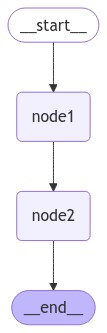

In [26]:
class State(TypedDict):
    input: str
    messages: Annotated[list, add_messages]
# Set up memory
memory = MemorySaver()

def node1(state:State):
    print("start node 1",state["input"])
    state["messages"]=state["input"]
    return state 
def node2(state:State):
    print("start node 2")
    state["messages"]="start node 2"
    return state   
    
builder = StateGraph(State)
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_edge("node1", "node2")
builder.set_entry_point("node1") 
builder.set_finish_point("node2") 

# Set up memory
memory = MemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
state=State()
state["input"]="HEllo"
thread = {"configurable": {"thread_id": "1"}} 
state=graph.invoke(state,thread)

start node 1 HEllo
start node 2


## Mit Panel App

In [28]:
state =State()
def input_function(question:str):
    global state
    thread = {"configurable": {"thread_id": "1"}}  
    state["input"]=question
    state=graph.invoke(state,thread)
    answer=state["messages"][-1].content
    print("input_function",answer)
    return answer

## Widget für die Eingabe
question = pn.widgets.TextInput(name="Input here please", placeholder="Task", sizing_mode="stretch_width")
## Panel für die AUsgabe
output = pn.pane.Markdown("Answer")

## Funktion, welche bei button_click der input_function die Frage, welche in das Widget eingegebn wurde übergibt. 
## Das Resultat von input_function wird an den output übetragen, weler in der App angezeigt wird 
def button_click(event):
    if answer_button.clicks > 0:
        bound_function = pn.bind(input_function, question)
        try:
            result = bound_function()
            output.object = f"Start answer:\n {result}"
        except Exception as e:
             output.object = f"Error in start_button_click: {e}"

answer_button = pn.widgets.Button(name="Answer", button_type="primary", width=50, height=50)
answer_button.on_click(button_click)

Tab = pn.Column(
            pn.Row(question),
            pn.panel(answer_button, loading_indicator=True, height=50),
            pn.layout.Divider(),
            pn.panel(output, loading_indicator=True, height=900),
            sizing_mode="stretch_width"
        )


layout = pn.Column(pn.Tabs(('Answer', Tab)))
layout.show()

Launching server at http://localhost:61041


# Exercise 2: Insert a third agent (node)